# Related to Figure 3a

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df_group = pd.read_csv('/data/yuchen_data/Stereo_seq/All_Figures/Figure3/1.data/Gene_cluster.v2.txt', index_col=0, sep='\t')
df_value = pd.read_csv('/data/yuchen_data/Stereo_seq/All_Figures/Figure3/1.data/Mat.vs.Immat.ScaledRst.txt', index_col=0, sep='\t')

In [10]:
df_group

,EndRes_pvalue,EndRes_logFC1_2,PatternRes_pvalue,PatternRes_fcMedian,EarlyRes_pvalue,EarlyRes_fcMedian,merged_cluster_v2
ACKR1,4.835312e-01,-0.556725,6.575074e-03,0.556712,7.530878e-03,1.172200,-1
JAML,2.586251e-01,-1.285060,3.445745e-09,1.159753,4.735377e-01,0.264638,2
TOR3A,1.267557e-01,-1.399592,7.787868e-03,0.643262,5.765012e-02,0.707829,-1
RCSD1,5.164596e-01,0.296142,8.437695e-15,0.683892,4.058995e-03,0.441453,1
MAP3K1,3.519612e-01,0.594174,3.215839e-03,0.576165,1.708168e-02,0.878425,1
...,...,...,...,...,...,...,...
RCAN2,8.731353e-01,-0.233827,3.204142e-06,0.911056,1.955227e-01,0.698969,2
IGFLR1,8.666488e-02,-1.251187,1.538927e-03,0.561209,5.194081e-02,1.011589,4
ANPEP,2.835404e-03,-0.974637,3.626004e-05,0.510547,9.668614e-02,0.185438,2
DLEC1,2.170425e-03,-4.424522,5.468907e-03,0.767358,5.139475e-01,0.461535,2


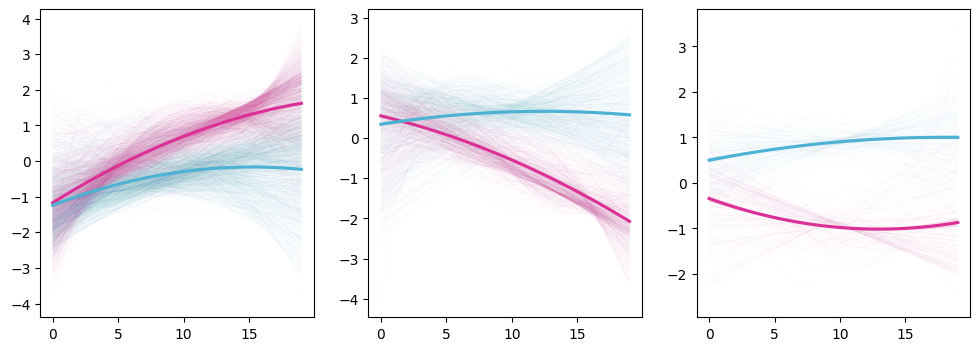

In [32]:
# line plot for pattern 1, 2, 3
def get_fit(group):
    df_plot_1 = df_value.loc[plot_genes, df_value.columns.str.startswith(group)]
    all_y = df_plot_1.values.flatten()
    all_x = list(range(20)) * df_plot_1.shape[0]
    df_plot_1_cur = pd.DataFrame(index=range(len(all_x)))
    df_plot_1_cur['x'] = all_x
    df_plot_1_cur['y'] = all_y
    return df_plot_1_cur

fig, axes = plt.subplots(figsize=(12, 4), nrows=1, ncols=3)
for idx in range(3):
    ax = axes[idx]
    group = idx + 1
    alpha = dic_alpha[group]
    plot_genes = df_group[df_group['merged_cluster_v2'] == group].index
    for gene in plot_genes:
        v1 = df_value.loc[gene, df_value.columns.str.startswith('l1')]
        v2 = df_value.loc[gene, df_value.columns.str.startswith('l2')]
        ax.plot(range(len(v1)), v1, c='#db3196', linewidth=0.01, alpha=1)
        ax.plot(range(len(v2)), v2, c='#4cb1d2', linewidth=0.01, alpha=1)

    df_plot_mature = get_fit('l1')
    sns.regplot(data=df_plot_mature, x='x', y='y', scatter=False, ax=ax, order=2, color='#db3196')

    df_plot_immature = get_fit('l2')
    sns.regplot(data=df_plot_immature, x='x', y='y', scatter=False, ax=ax, order=2, color='#4cb1d2')

    ax.set_xlabel('')
    ax.set_ylabel('')
plt.show()

In [17]:
df_value

,l1:t0,l1:t36.9730074112519,l1:t73.9460148225038,l1:t110.919022233756,l1:t147.892029645008,l1:t184.865037056259,l1:t221.838044467511,l1:t258.811051878763,l1:t295.784059290015,l1:t332.757066701267,...,l2:t253.087579641118,l2:t278.39633760523,l2:t303.705095569341,l2:t329.013853533453,l2:t354.322611497565,l2:t379.631369461677,l2:t404.940127425789,l2:t430.2488853899,l2:t455.557643354012,l2:t480.866401318124
FNDC7,-1.950995,-1.515269,-1.085871,-0.662992,-0.218866,0.251243,0.655082,0.897833,0.975572,0.915759,...,0.945791,0.832020,0.658559,0.435509,0.172969,-0.118962,-0.430185,-0.750599,-1.070107,-1.378607
AC007448.2,-1.169249,-0.858118,-0.550361,-0.246079,0.069529,0.398989,0.693121,0.900940,1.017457,1.053567,...,0.963384,0.759941,0.454421,0.064159,-0.393509,-0.901250,-1.441728,-1.997609,-2.551558,-3.086241
TRAJ36,-1.005098,-0.828278,-0.651458,-0.474638,-0.297818,-0.120998,0.055822,0.232642,0.409462,0.586282,...,-0.674938,-0.675429,-0.675920,-0.676411,-0.676902,-0.677393,-0.677884,-0.678375,-0.678866,-0.679357
ABHD1,0.884286,0.893308,0.896114,0.888795,0.877969,0.868329,0.849173,0.808334,0.742214,0.650170,...,-0.231662,-0.436795,-0.643087,-0.850361,-1.058436,-1.267133,-1.476275,-1.685681,-1.895173,-2.104571
AK8,0.519078,0.429651,0.340214,0.250755,0.161258,0.071705,-0.017919,-0.107629,-0.197427,-0.287310,...,0.228829,0.019402,-0.190024,-0.399448,-0.608870,-0.818292,-1.027714,-1.237136,-1.446557,-1.655980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
IGHV3-33-2,-0.936748,-0.764907,-0.593065,-0.421223,-0.249381,-0.077540,0.094302,0.266144,0.437986,0.609828,...,-0.696011,-0.696537,-0.697063,-0.697588,-0.698114,-0.698640,-0.699165,-0.699691,-0.700217,-0.700742
AC074387.1,-2.569537,-2.263891,-1.957181,-1.649377,-1.345142,-1.045272,-0.734269,-0.399020,-0.057323,0.262348,...,0.633387,0.633388,0.633388,0.633389,0.633390,0.633390,0.633391,0.633392,0.633393,0.633393
LINC01651,0.608994,0.608964,0.608934,0.608904,0.608874,0.608844,0.608814,0.608784,0.608754,0.608724,...,0.886869,0.829146,0.642361,0.346602,-0.038038,-0.491472,-0.993608,-1.524357,-2.063629,-2.591334
IGHV3-32,0.170211,0.250373,0.330536,0.410698,0.490861,0.571023,0.651186,0.731348,0.811511,0.891674,...,-0.931807,-0.931911,-0.932015,-0.932119,-0.932223,-0.932326,-0.932430,-0.932534,-0.932638,-0.932742


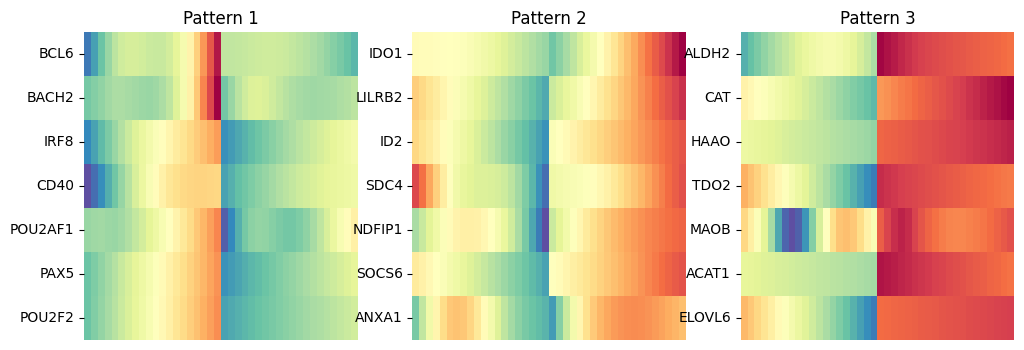

In [30]:
# heatmap of representative genes 
fig, axes = plt.subplots(figsize=(12, 4), nrows=1, ncols=3)

df_value.clip(-2, 2)
# pattern1
ax1 = axes[0]
plot_genes = ['BCL6', 'BACH2', 'IRF8', 'CD40', 'POU2AF1', 'PAX5', 'POU2F2']
df_plot = df_value.reindex(plot_genes)
sns.heatmap(df_plot, cmap='Spectral_r', cbar=False, ax=ax1)
ax1.set_xticks([])
ax1.set_title('Pattern 1')

ax2 = axes[1]
plot_genes = ['IDO1', 'LILRB2', 'ID2', 'SDC4', 'NDFIP1', 'SOCS6', 'ANXA1']
df_plot = df_value.reindex(plot_genes)
sns.heatmap(df_plot, cmap='Spectral_r', cbar=False, ax=ax2)
ax2.set_xticks([])
ax2.set_title('Pattern 2')

ax3 = axes[2]
plot_genes = ['ALDH2', 'CAT', 'HAAO', 'TDO2', 'MAOB', 'ACAT1', 'ELOVL6']
df_plot = df_value.reindex(plot_genes)
sns.heatmap(df_plot, cmap='Spectral_r', cbar=False, ax=ax3)
ax3.set_xticks([])
ax3.set_title('Pattern 3')
plt.show()